In [1]:
import numpy as np
from EM import EM
from plot import plot
import matplotlib.pyplot as plt

In [2]:
# EM Setting
num_past_effects = 3
training_pct = .8
single_effect = False

In [3]:
data = np.load('../Data/inr_preprocessed_data.npz')

In [4]:
%%time
em = EM(data['y_mtx'], data['X_mtx'], data['c_mtx'], num_past_effects, K=0, train_pct=training_pct, X_prev_given=True,
        X_prev = data['X_prev_mtx'], single_effect=single_effect)
em.run_EM(20)

/home/bear/Documents/Counterfactual-Prediction/EM.py:469: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(self.sigma_pred[n, index]+self.sigma_2))


max iterations: 20 reached
CPU times: user 1min 21s, sys: 8.29 ms, total: 1min 21s
Wall time: 1min 21s


In [5]:
em.get_MSE()

0.8992036772994666

In [6]:
treatment_types = ['nsaid', 'transfusion_plasma', 'transfusion_platelet', 'anticoagulant', 'aspirin']
for i, treatment in enumerate(treatment_types):
    print('Coefficient for {}: {}'.format(treatment, em.A[:, i]))
static_types = ['chronic kidney failure', 'sickle cell', 'age']
for j, static in enumerate(static_types):
    print('Coefficient for {}: {}'.format(static, em.b[j]))

Coefficient for nsaid: [-0.13322634 -0.12391392 -0.08919592]
Coefficient for transfusion_plasma: [-0.88524994 -0.08347947 -0.01094854]
Coefficient for transfusion_platelet: [-0.57606201 -0.20609025 -0.29091497]
Coefficient for anticoagulant: [-0.92497705 -0.94416475 -0.66603521]
Coefficient for aspirin: [-0.2494914  -0.10602337  0.11839083]
Coefficient for chronic kidney failure: -0.6016789316135485
Coefficient for sickle cell: -1.1546626762649492
Coefficient for age: -0.04571895443567536


In [7]:
random_patients = np.random.randint(0, em.y.shape[0], 0)
for i in random_patients:
    plot(em, i, time_unit=18)

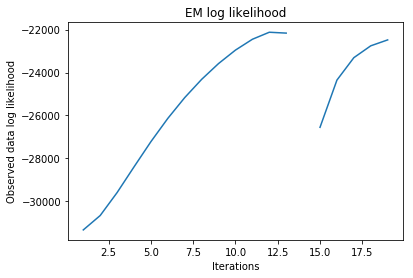

In [8]:
plt.plot([i for i in range(1, len(em.obs_log_lik))], em.obs_log_lik[1:])
plt.xlabel('Iterations')
plt.ylabel('Observed data log likelihood')
plt.title('EM log likelihood')
plt.show()

In [9]:
em.obs_log_lik

[-61759.93169615652,
 -31344.004455687016,
 -30672.39399653447,
 -29601.006235004344,
 -28402.582690380987,
 -27225.216185131467,
 -26139.153627921318,
 -25169.716618709877,
 -24319.25208670889,
 -23581.898224652734,
 -22954.578868389584,
 -22449.55990597836,
 -22121.6608774863,
 -22161.95556197586,
 nan,
 -26557.159724898687,
 -24354.281382649562,
 -23308.308002785674,
 -22755.10903669045,
 -22478.838453326713]